In [0]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [0]:
path = os.getcwd()

In [0]:
ROOT = '/content/drive'     # Raíz del Drive por Default
PROJ = '/content/drive/My Drive/data_covid'# Dirección del proyecto en donde este
drive.mount(ROOT, force_remount=True)  # Montamos el drive
df = pd.read_csv(os.path.join(PROJ, 'covid19_merged.csv'))
# df = pd.read_csv(r'C:\Users\macorream\Desktop\covid19\data\covid19_merged.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


FileNotFoundError: ignored

In [0]:
df.shape

(173, 65)

## Data Cleaning

In [0]:
df.columns

Index(['Unnamed: 0', 'country', 'covid_confirmed_4_2_20',
       'covid_deaths_4_2_20', 'covid_recovered_4_2_20', 'covid19_first_date',
       'Flu_pneumonia_death_rate_per_100000', 'h1n1_Geographic_spread',
       'h1n1_Intensity', 'h1n1_Impact_on_healthcare_services',
       'h1n1_Cases_underestimate', 'h1n1_Cases_confirmed',
       'h1n1_Deaths_confirmed', 'first_school_closure_date', 'code_2digit_x',
       'code_3digit_x', 'jan_temp', 'feb_temp', 'mar_temp', 'apr_temp',
       'may_temp', 'jun_temp', 'july_temp', 'aug_temp', 'sept_temp',
       'oct_temp', 'nov_temp', 'dec_temp', 'annual_temp', 'Jan_precip',
       'Feb_precip', 'Mar_precip', 'Apr_precip', 'May_precip', 'Jun_precip',
       'July_precip', 'Aug_precip', 'Sept_precip', 'Oct_precip', 'Nov_precip',
       'Dec_precip', 'Annual_precip', 'airport_traffic_2018_thousands',
       'property_Affordability_Index', 'Health_Care_Index',
       'hosp_beds_per_1000_2017', 'ICU-CCB_beds_per_100000', 'Population_2020',
       'Den

### Not Useful Columns Yet

In [0]:
columns_to_drop = ['Unnamed: 0', 'code_3digit_x', 'code_2digit_x', 'covid19_first_date', 'first_school_closure_date']
df.drop(columns=columns_to_drop, inplace=True)

In [0]:
from pandas.api.types import is_numeric_dtype
columns = df.columns
no_numeric = [c for c in columns if not is_numeric_dtype(df[c])]
no_numeric

['country',
 'h1n1_Geographic_spread',
 'h1n1_Intensity',
 'h1n1_Impact_on_healthcare_services',
 'Density_KM2m',
 'Fertility_rate',
 'Median_age',
 'Urban_pop_pct',
 'sex_male_to_female_total']

In [0]:
# Making Ordinal Categorical variables Numerical and Handling NaN miss imputed values
columns_with_nan = ['Median_age', 'Density_KM2m', 'Urban_pop_pct', 'sex_male_to_female_total', 'Fertility_rate']
df['Density_KM2m'] = df['Density_KM2m'].apply(lambda x: str(x).replace(',', ''))
df['Urban_pop_pct'] = df['Urban_pop_pct'].apply(lambda x: str(x).replace('%', ''))

for x in columns_with_nan:
    df[x] = df[x].replace('N.A.', np.nan)
    df[x] = df[x].replace('nan', np.nan)
    df[x] = df[x].replace('-', np.nan)
    df[x] = df[x].apply(pd.to_numeric)

In [0]:
def ordinal_transformation(row):
    if row.h1n1_Intensity == '***':
        row.h1n1_Intensity = 3
    elif row.h1n1_Intensity == '**':
        row.h1n1_Intensity = 2
    elif row.h1n1_Intensity == '*':
        row.h1n1_Intensity = 1

    if row.h1n1_Impact_on_healthcare_services == 'mod':
        row.h1n1_Impact_on_healthcare_services = 3
    elif row.h1n1_Impact_on_healthcare_services == 'low2':
        row.h1n1_Impact_on_healthcare_services = 2
    elif row.h1n1_Impact_on_healthcare_services == 'low':
        row.h1n1_Impact_on_healthcare_services = 1

    return row

In [0]:
df = df.apply(lambda x: h1n1_transformation(x), axis=1)

NameError: ignored

In [0]:
df.columns

Index(['covid_confirmed_4_2_20', 'covid_deaths_4_2_20',
       'covid_recovered_4_2_20', 'Flu_pneumonia_death_rate_per_100000',
       'h1n1_Geographic_spread', 'h1n1_Intensity',
       'h1n1_Impact_on_healthcare_services', 'h1n1_Cases_underestimate',
       'h1n1_Cases_confirmed', 'h1n1_Deaths_confirmed', 'jan_temp', 'feb_temp',
       'mar_temp', 'apr_temp', 'may_temp', 'jun_temp', 'july_temp', 'aug_temp',
       'sept_temp', 'oct_temp', 'nov_temp', 'dec_temp', 'annual_temp',
       'Jan_precip', 'Feb_precip', 'Mar_precip', 'Apr_precip', 'May_precip',
       'Jun_precip', 'July_precip', 'Aug_precip', 'Sept_precip', 'Oct_precip',
       'Nov_precip', 'Dec_precip', 'Annual_precip',
       'airport_traffic_2018_thousands', 'property_Affordability_Index',
       'Health_Care_Index', 'hosp_beds_per_1000_2017',
       'ICU-CCB_beds_per_100000', 'Population_2020', 'Density_KM2m',
       'Fertility_rate', 'Median_age', 'Urban_pop_pct', 'gdp_usd_million',
       'age_0_to_14_years_percent', '

### Missing Values

In [0]:
missing_values = df.isnull().sum()
missing_values[missing_values.values > 0].sort_values(ascending=False)

ICU-CCB_beds_per_100000                          137
hosp_beds_per_1000_2017                          136
h1n1_Intensity                                   103
h1n1_Impact_on_healthcare_services               103
Health_Care_Index                                 84
h1n1_Geographic_spread                            81
property_Affordability_Index                      75
airport_traffic_2018_thousands                    45
sept_temp                                         19
Oct_precip                                        19
Sept_precip                                       19
Aug_precip                                        19
May_precip                                        19
Jun_precip                                        19
Dec_precip                                        19
Apr_precip                                        19
Mar_precip                                        19
Feb_precip                                        19
Jan_precip                                    

## Data Analysis

In [0]:
from google.colab import drive
drive.mount('/content/drive')

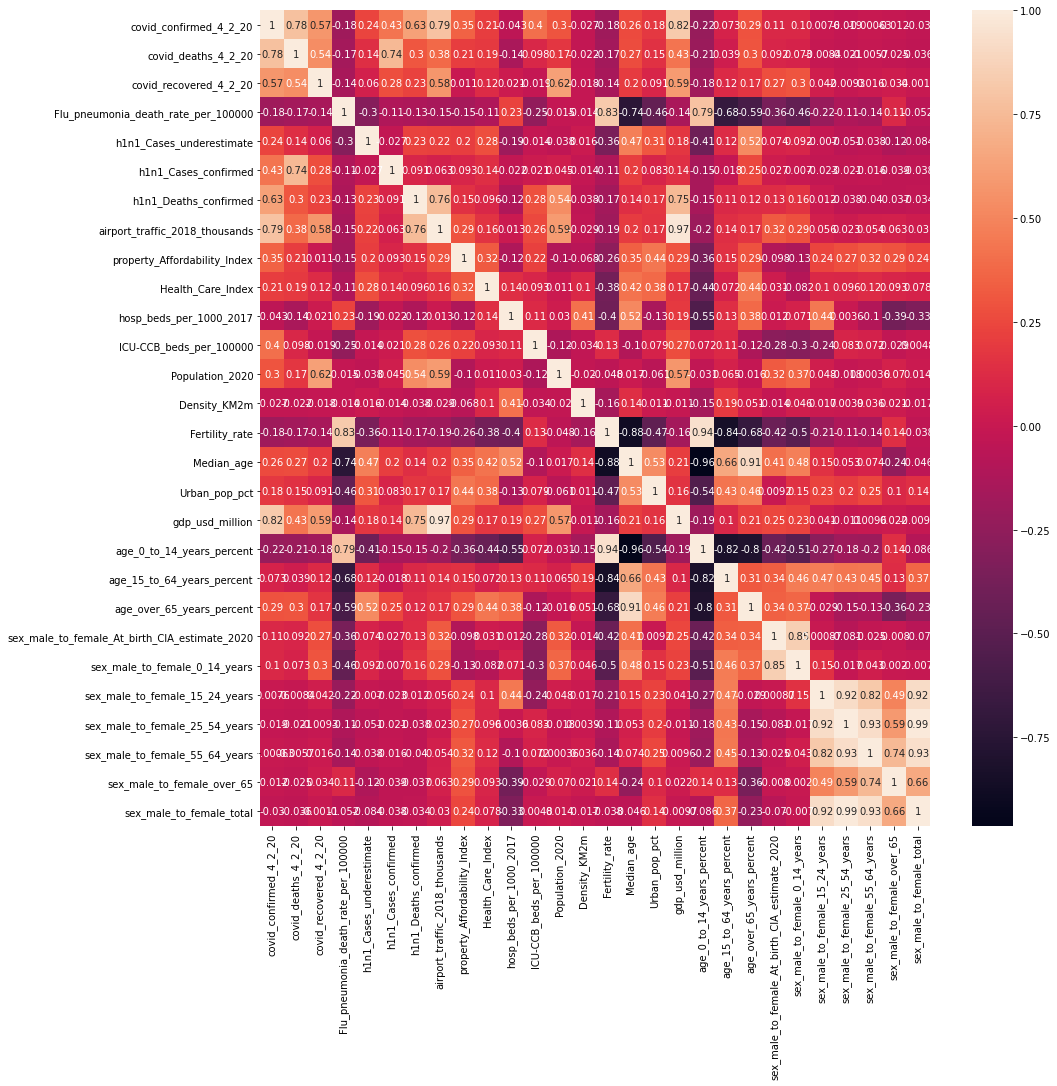

In [0]:
no_weather_columns = [x for x in list(df.columns) if 'temp' not in x and 'precip' not in x]
corr = df[no_weather_columns].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

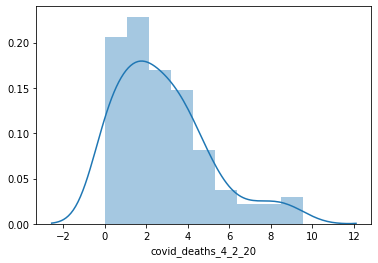

In [0]:
ax = sns.distplot(np.log(df[df['covid_deaths_4_2_20']>0]['covid_deaths_4_2_20']));
plt.show()

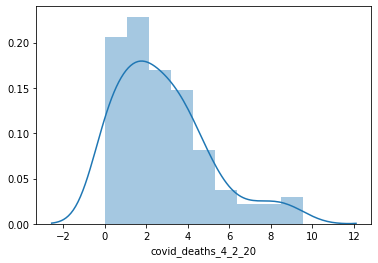

In [0]:
ax = sns.distplot(np.log(df[df['covid_deaths_4_2_20']>0]['covid_deaths_4_2_20']));
plt.show()

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
%matplotlib inline
configure_plotly_browser_state()

In [0]:
import matplotlib
from matplotlib import cm
import numpy as np

norm = matplotlib.colors.Normalize(vmin=0, vmax=255)
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []

    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])

    return pl_colorscale

In [0]:
# CoronavirusMap deaths and confirmed cases
import plotly.graph_objects as go
df_map = df

df_map['text'] = 'country' + df_map['country'] \
        + '<br>Confirmed cases:' + df_map['covid_confirmed_4_2_20'].astype(str) \
        + '<br>Fatalities:' +df_map['covid_deaths_4_2_20'].astype(str)

autumn_cmap = matplotlib.cm.get_cmap('autumn_r')
autumn = matplotlib_to_plotly(autumn_cmap, 255)
fig = go.Figure(data=go.Scattergeo(
        lon = df_map['longitude'],
        lat = df_map['latitude'],
        text = df_map['text'],
        mode = 'markers',        
        marker = dict(
            size = df_map['covid_confirmed_4_2_20']*0.0003,
            opacity = 0.6,
            autocolorscale = False,
            symbol = 'circle',
            line = dict(
                width=0.1,
                color='Black'
            ),
            colorscale = autumn,
            cmin = df_map['covid_deaths_4_2_20'].min(),
            cmax = df_map['covid_deaths_4_2_20'].max(),
            color = df_map['covid_deaths_4_2_20'],            
            colorbar_title="Cantidad de muertos",           
        ),
))

fig.update_geos(
    projection_type="kavrayskiy7",
    showcountries=True, countrycolor="#303338",
    showcoastlines=True, coastlinecolor="black",
    showland=True, landcolor="gray",
    showocean=True, oceancolor="dodgerblue",
    showlakes=False,  
    #  lataxis = dict (
    #         range= [ -60, 90 ]
    #     )  
)

fig.update_layout(
        title = 'Casos confirmados de coronavirus en el mundo',             
    )
fig.show()

In [0]:
df.head()

,country,covid_confirmed_4_2_20,covid_deaths_4_2_20,covid_recovered_4_2_20,Flu_pneumonia_death_rate_per_100000,h1n1_Geographic_spread,h1n1_Intensity,h1n1_Impact_on_healthcare_services,h1n1_Cases_underestimate,h1n1_Cases_confirmed,h1n1_Deaths_confirmed,jan_temp,feb_temp,mar_temp,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip,airport_traffic_2018_thousands,property_Affordability_Index,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,Population_2020,Density_KM2m,Fertility_rate,Median_age,Urban_pop_pct,gdp_usd_million,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_At_birth_CIA_estimate_2020,sex_male_to_female_0_14_years,sex_male_to_female_15_24_years,sex_male_to_female_25_54_years,sex_male_to_female_55_64_years,sex_male_to_female_over_65,sex_male_to_female_total,latitude,longitude,text
0,Afghanistan,273,6,10,64.21,NaN,NaN,NaN,0.0,853.0,17.0,0.073058,2.109406,7.596974,13.370239,18.216310,23.201315,25.258537,23.766517,19.034575,12.992646,7.004094,2.433517,12.921455,43.275641,49.184578,64.971418,49.406624,24.182488,4.559185,8.034326,7.736403,3.667420,9.355273,15.409127,31.539374,311.321856,1722613.0,NaN,NaN,NaN,NaN,38928346.0,60.0,4.6,18.0,25.0,18734.0,43.2,54.2,2.6,1.05,1.03,1.03,1.03,0.97,0.85,1.03,33.939110,67.709953,countryAfghanistan<br>Confirmed cases:273<br>F...
1,Albania,277,16,76,11.29,S,*,mod,0.0,426.0,12.0,2.023067,3.218058,6.035317,9.917867,14.442750,17.927750,20.538917,20.479667,17.159083,12.265775,7.575808,3.653617,11.269800,107.999418,102.625834,93.433083,86.162500,74.273917,54.579168,39.075000,45.696333,67.568500,105.261417,138.264167,138.295834,1053.235184,303137.0,0.79,53.05,NaN,NaN,2877797.0,105.0,1.6,36.0,63.0,15418.0,17.4,68.9,13.2,1.08,1.11,1.09,0.93,0.95,0.87,0.98,41.153332,20.168331,countryAlbania<br>Confirmed cases:277<br>Fatal...
2,Algeria,986,86,61,27.82,NaN,NaN,NaN,0.0,916.0,57.0,12.122497,14.790195,17.913503,21.936382,26.414028,30.796468,32.538921,31.974539,28.824309,23.339123,17.308995,12.950636,22.575791,8.991997,8.603531,9.393841,8.036687,6.555783,3.373740,2.065213,3.687830,5.128239,7.328424,9.528861,9.279404,81.973549,6442442.0,0.67,54.86,NaN,NaN,43851044.0,18.0,3.1,29.0,73.0,172781.0,29.3,64.5,6.2,1.05,1.05,1.05,1.03,1.01,0.89,1.03,28.033886,1.659626,countryAlgeria<br>Confirmed cases:986<br>Fatal...
3,Andorra,428,15,10,NaN,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77265.0,164.0,NaN,NaN,88.0,NaN,NaN,NaN,NaN,1.07,1.05,1.08,1.05,1.15,1.02,1.06,42.546245,1.601554,countryAndorra<br>Confirmed cases:428<br>Fatal...
4,Angola,8,2,1,176.70,NaN,NaN,NaN,0.0,37.0,0.0,22.582236,22.683536,22.784139,22.353582,20.739575,18.373315,17.946175,19.902466,22.187548,23.181599,22.786151,22.610858,21.510933,154.987404,148.544214,169.914693,109.072267,15.142675,0.372332,0.321137,3.413405,20.102274,69.766698,144.510161,155.158423,991.305683,1516628.0,NaN,NaN,NaN,NaN,32866272.0,26.0,5.6,17.0,67.0,91527.0,46.8,50.8,2.4,1.05,1.04,1.04,1.02,0.94,1.50,1.02,-11.202692,17.873887,countryAngola<br>Confirmed cases:8<br>Fataliti...


,country,covid_confirmed_4_2_20,covid_deaths_4_2_20,covid_recovered_4_2_20,Flu_pneumonia_death_rate_per_100000,h1n1_Geographic_spread,h1n1_Intensity,h1n1_Impact_on_healthcare_services,h1n1_Cases_underestimate,h1n1_Cases_confirmed,h1n1_Deaths_confirmed,jan_temp,feb_temp,mar_temp,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Jan_precip,Feb_precip,Mar_precip,Apr_precip,May_precip,Jun_precip,July_precip,Aug_precip,Sept_precip,Oct_precip,Nov_precip,Dec_precip,Annual_precip,airport_traffic_2018_thousands,property_Affordability_Index,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,Population_2020,Density_KM2m,Fertility_rate,Median_age,Urban_pop_pct,gdp_usd_million,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_At_birth_CIA_estimate_2020,sex_male_to_female_0_14_years,sex_male_to_female_15_24_years,sex_male_to_female_25_54_years,sex_male_to_female_55_64_years,sex_male_to_female_over_65,sex_male_to_female_total,latitude,longitude,text
34,Colombia,1161,19,55,20.91,W,*,mod,0.0,4310.0,272.0,24.620884,24.980745,25.143164,24.748686,24.351952,23.890774,23.789444,24.043557,24.21475,24.291812,24.384102,24.385898,24.403812,111.632013,116.882731,165.628193,255.55525,303.013715,292.999121,260.702737,245.240774,234.020559,270.66879,218.026844,144.214454,2618.585183,33704037.0,0.39,67.24,1.7,NaN,50882891.0,46.0,1.8,31.0,80.0,327895.0,23.5,68.9,7.6,1.06,1.05,1.04,0.98,0.88,0.72,0.98,4.570868,-74.297333,countryColombia<br>Confirmed cases:1161<br>Fat...


In [0]:
df_colombia = df[df["country"] == "Colombia"]
values = df_colombia[["age_0_to_14_years_percent", "age_15_to_64_years_percent", "age_over_65_years_percent"]].values
values = np.squeeze(values)
values

array([23.5, 68.9,  7.6])

In [0]:
# CoronavirusMap deaths and confirmed cases
import plotly.graph_objects as go
fig = go.Figure(data=go.Scattergeo())

fig.update_geos(
    projection_type="equirectangular",
    showcountries=True, countrycolor="#303338",
    showcoastlines=True, coastlinecolor="black",
    showland=True, landcolor="gray",
    showocean=True, oceancolor="dodgerblue",
    showlakes=False,  
    #  lataxis = dict (
    #         range= [ -10, 90 ]
    #     )  
)


fig.show()

In [0]:
import plotly.express as px
df_colombia = df[df["country"] == "Colombia"]
values = df_colombia[["age_0_to_14_years_percent", "age_15_to_64_years_percent", "age_over_65_years_percent"]].values
values = np.squeeze(values)
fig = px.pie(df_colombia, values=values, 
             names=["age 0 to 14 years","age 15 to 64 years", "age over 65 years percent"], color_discrete_sequence=px.colors.sequential.RdBu)

# Add images
fig.add_layout_image(
        dict(
            source="https://raw.githubusercontent.com/michaelbabyn/plot_data/master/bridge.jpg",
            xref="x",
            yref="y",
            x=0,
            y=3,
            sizex=8,
            sizey=8,
            #sizing="stretch",
            #opacity=0.5,
            layer="below")
)
# Set templates
fig.update_layout(template="plotly_white")
fig.show()


In [0]:
int(x * 10)/10

0.5

In [0]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Constants
img_width = 1600
img_height = 900
scale_factor = 1

import plotly.express as px

# values = df_colombia[["age_0_to_14_years_percent", "age_15_to_64_years_percent", "age_over_65_years_percent"]].values
# values = np.squeeze(values)
# fig = px.pie(df_colombia, values=values, 
#              names=["age 0 to 14 years","age 15 to 64 years", "age over 65 years percent"], color_discrete_sequence=px.colors.sequential.RdBu)

figures = []
df_colombia = df[df["country"] == "Portugal"]
longitude=(df_colombia["longitude"] + 180)/360
latitude = (df_colombia["latitude"] + 90)/180
x = np.squeeze(longitude.values)
y = np.squeeze(latitude.values)
fig = go.Figure([
    go.Pie(values=values, 
             labels=["age 0 to 14 years","age 15 to 64 years", "age over 65 years percent"], 
             domain={
                 #"x":[0.12, 0.22],
                 "x":[x -0.1, x + 0.11],
                 "y":[y - 0.03, y -0.01],
             }                        
        )
])

# Configure axes
fig.update_xaxes(
    visible=False,
    range=[0, img_width * scale_factor]
)

fig.update_yaxes(
    visible=False,
    range=[0, img_height * scale_factor],
    # the scaleanchor attribute ensures that the aspect ratio stays constant
    scaleanchor="x"
)

# Add image
fig.add_layout_image(
    dict(
        x=0,
        sizex=img_width * scale_factor,
        y=img_height * scale_factor,
        sizey=img_height * scale_factor,
        xref="x",
        yref="y",
        opacity=1.0,
        layer="below",
        sizing="stretch",
        source="https://raw.githubusercontent.com/ljpalaciom/proyecto1Telematica/master/mapita.png")
)

# Configure other layout
fig.update_layout(
    width=img_width * scale_factor,
    height=img_height * scale_factor,
    margin={"l": 0, "r": 0, "t": 0, "b": 0},
)

# Disable the autosize on double click because it adds unwanted margins around the image
# More detail: https://plotly.com/python/configuration-options/
fig.show(config={'doubleClick': 'reset'})

NameError: ignored

In [0]:
x1

22    0.01038
Name: longitude, dtype: float64

In [0]:
df_colombia = df[df["country"] == "Colombia"]
df_colombia[["latitude", "longitude"]]

longitude = (df_colombia["longitude"] + 180)/360
latitude = (df_colombia["latitude"] + 90)/180
longitude, latitude

(34    0.293619
 Name: longitude, dtype: float64, 34    0.525394
 Name: latitude, dtype: float64)

In [0]:
# Graph hospital beds vs covid confirmed
import plotly.express as px
df_graph = df.loc[~df["ICU-CCB_beds_per_100000"].isnull()]
fig = px.bar(df_graph, y='ICU-CCB_beds_per_100000', x='country', text='ICU-CCB_beds_per_100000', color='covid_confirmed_4_2_20', color_continuous_scale="peach",
             labels={
                 "covid_confirmed_4_2_20":"Casos confirmados",
                 "country":"Pais",
                 "ICU-CCB_beds_per_100000": "Camas en UCI por cada 100k personas"
             })
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='group', xaxis_tickangle=30)

fig.update_layout(
        title = 'Número de camas UCI por cada 100K personas por país',  
        xaxis_title="Países",          
    )
fig.show()

In [0]:
# Graph hospital ICU beds vs deaths
 
import plotly.express as px
df_graph = df.loc[~df["ICU-CCB_beds_per_100000"].isnull()]
fig = px.bar(df_graph, y='ICU-CCB_beds_per_100000', x='country', text='ICU-CCB_beds_per_100000', color='covid_deaths_4_2_20', color_continuous_scale="peach",
             labels={
                 "covid_deaths_4_2_20":"Muertes",
                 "country":"Pais",
                 "ICU-CCB_beds_per_100000": "Camas en UCI por cada 100k personas"
             })
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(barmode='group', xaxis_tickangle=30)

fig.update_layout(
        title = 'Número de camas UCI por cada 100K personas por país',  
        xaxis_title="Países",          
    )
fig.show()

In [0]:
#Variables outliers search